<a href="https://colab.research.google.com/github/Chandanlokesh/network_trafic/blob/main/combained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

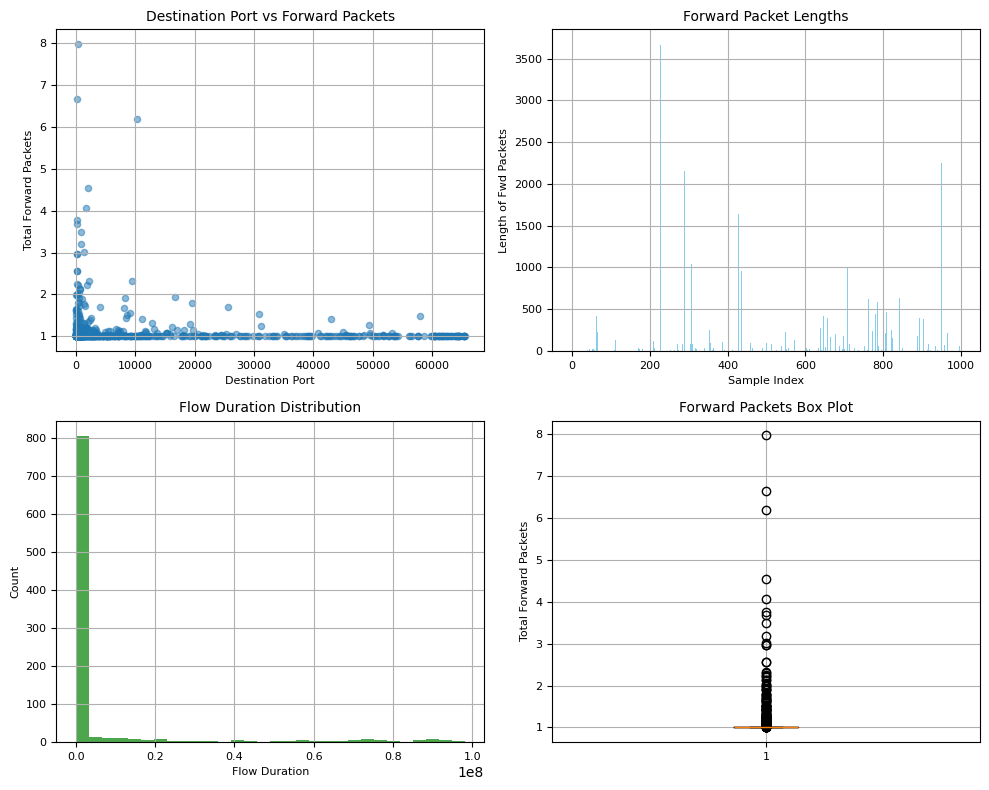

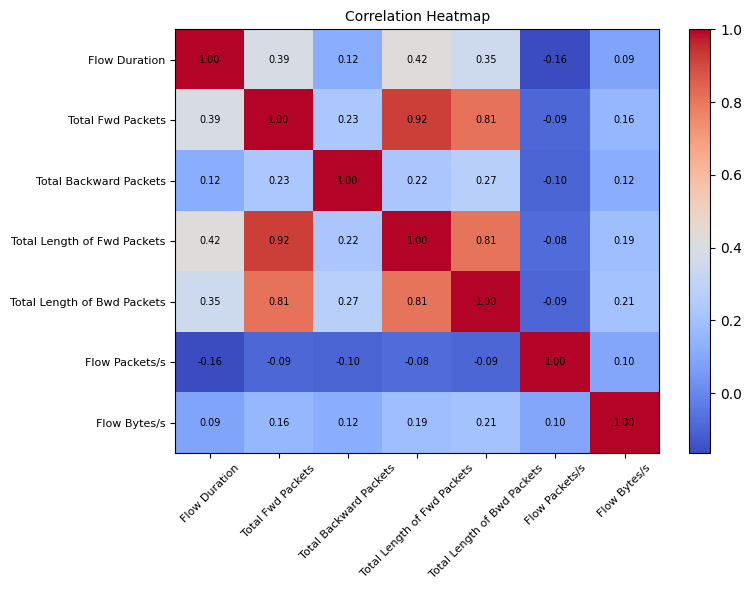

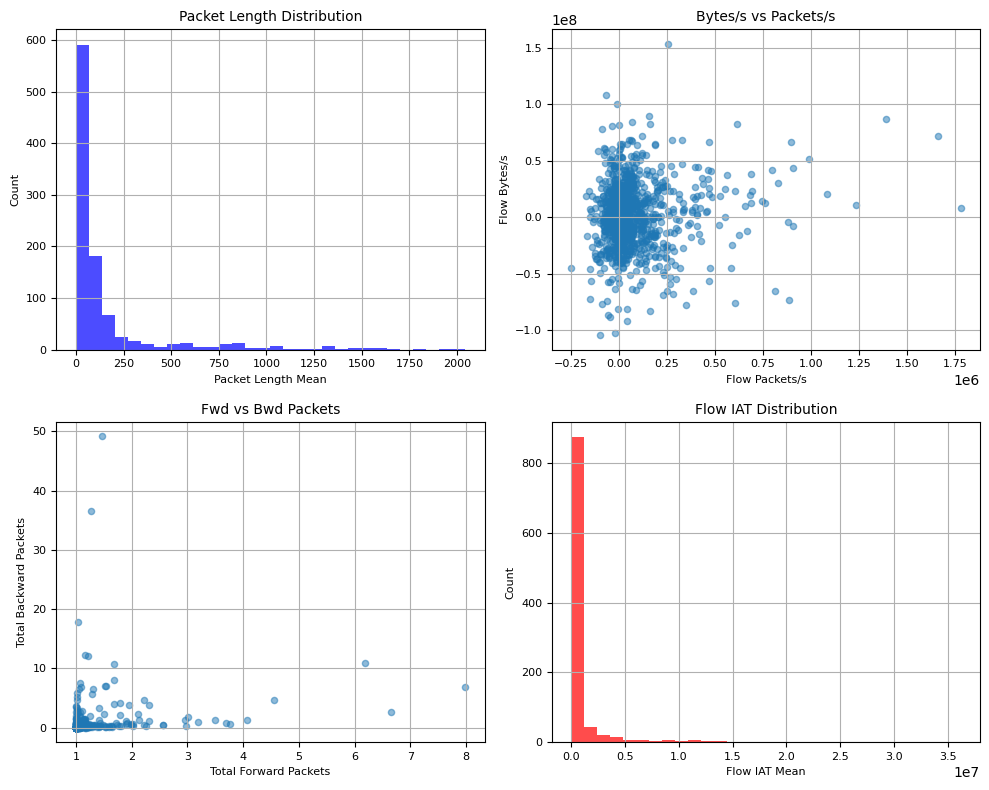


Basic Statistics of Key Features:
       Flow Duration  Total Fwd Packets  Total Backward Packets  \
count   1.000000e+03        1000.000000            1.000000e+03   
mean    1.200382e+07           1.093723            3.789853e-01   
std     3.001796e+07           0.441339            2.294831e+00   
min    -1.300000e+01           1.000000            3.355859e-28   
25%    -1.299999e+01           1.000000            7.369745e-09   
50%    -3.600639e+00           1.000013            1.211586e-04   
75%     3.542382e+05           1.007778            3.057239e-02   
max     1.198929e+08           7.981871            4.914582e+01   

       Total Length of Fwd Packets  Total Length of Bwd Packets  \
count                 1.000000e+03                 1.000000e+03   
mean                  5.802735e+01                 6.338507e+02   
std                   2.353391e+02                 2.130771e+03   
min                   3.315518e-19                 1.285388e-19   
25%                   2.73

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/Synthetic_traffic.csv')  # Replace with your filename

# Create figure for first set of plots with smaller size
plt.figure(figsize=(10, 8))

# 1. Scatter plot of Destination Port vs Forward Packets
plt.subplot(2, 2, 1)
plt.scatter(df['Destination Port'], df['Total Fwd Packets'], alpha=0.5, s=20)
plt.title('Destination Port vs Forward Packets', fontsize=10)
plt.xlabel('Destination Port', fontsize=8)
plt.ylabel('Total Forward Packets', fontsize=8)
plt.grid(True)
plt.tick_params(labelsize=8)

# 2. Bar plot of Forward Packet Lengths
plt.subplot(2, 2, 2)
plt.bar(range(len(df)), df['Total Length of Fwd Packets'], color='skyblue', width=0.8)
plt.title('Forward Packet Lengths', fontsize=10)
plt.xlabel('Sample Index', fontsize=8)
plt.ylabel('Length of Fwd Packets', fontsize=8)
plt.grid(True)
plt.tick_params(labelsize=8)

# 3. Histogram of Flow Duration
plt.subplot(2, 2, 3)
flow_duration_filtered = df[df['Flow Duration'] < df['Flow Duration'].quantile(0.95)]
plt.hist(flow_duration_filtered['Flow Duration'], bins=30, color='green', alpha=0.7)
plt.title('Flow Duration Distribution', fontsize=10)
plt.xlabel('Flow Duration', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.grid(True)
plt.tick_params(labelsize=8)

# 4. Box plot of Forward Packets
plt.subplot(2, 2, 4)
plt.boxplot(df['Total Fwd Packets'])
plt.title('Forward Packets Box Plot', fontsize=10)
plt.ylabel('Total Forward Packets', fontsize=8)
plt.grid(True)
plt.tick_params(labelsize=8)

plt.tight_layout()
plt.show()

# Create correlation heatmap with smaller size
plt.figure(figsize=(8, 6))

# Select important features for correlation
features_for_correlation = [
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Total Length of Bwd Packets',
    'Flow Packets/s',
    'Flow Bytes/s'
]

# Calculate correlation matrix
correlation = df[features_for_correlation].corr()

# Create heatmap
im = plt.imshow(correlation, cmap='coolwarm', aspect='auto')
plt.colorbar(im)

# Add correlation values as text
for i in range(len(correlation)):
    for j in range(len(correlation)):
        text = plt.text(j, i, f'{correlation.iloc[i, j]:.2f}',
                       ha='center', va='center', fontsize=7)

plt.xticks(range(len(features_for_correlation)), features_for_correlation, rotation=45, fontsize=8)
plt.yticks(range(len(features_for_correlation)), features_for_correlation, fontsize=8)
plt.title('Correlation Heatmap', fontsize=10)
plt.tight_layout()
plt.show()

# Create additional visualizations with smaller size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

# 1. Packet Length Distribution
ax1.hist(df['Packet Length Mean'], bins=30, color='blue', alpha=0.7)
ax1.set_title('Packet Length Distribution', fontsize=10)
ax1.set_xlabel('Packet Length Mean', fontsize=8)
ax1.set_ylabel('Count', fontsize=8)
ax1.tick_params(labelsize=8)
ax1.grid(True)

# 2. Flow Bytes/s vs Flow Packets/s
ax2.scatter(df['Flow Packets/s'], df['Flow Bytes/s'], alpha=0.5, s=20)
ax2.set_title('Bytes/s vs Packets/s', fontsize=10)
ax2.set_xlabel('Flow Packets/s', fontsize=8)
ax2.set_ylabel('Flow Bytes/s', fontsize=8)
ax2.tick_params(labelsize=8)
ax2.grid(True)

# 3. Forward vs Backward Packets
ax3.scatter(df['Total Fwd Packets'], df['Total Backward Packets'], alpha=0.5, s=20)
ax3.set_title('Fwd vs Bwd Packets', fontsize=10)
ax3.set_xlabel('Total Forward Packets', fontsize=8)
ax3.set_ylabel('Total Backward Packets', fontsize=8)
ax3.tick_params(labelsize=8)
ax3.grid(True)

# 4. Flow IAT Distribution
ax4.hist(df['Flow IAT Mean'], bins=30, color='red', alpha=0.7)
ax4.set_title('Flow IAT Distribution', fontsize=10)
ax4.set_xlabel('Flow IAT Mean', fontsize=8)
ax4.set_ylabel('Count', fontsize=8)
ax4.tick_params(labelsize=8)
ax4.grid(True)

plt.tight_layout()
plt.show()

# Print basic statistics
print("\nBasic Statistics of Key Features:")
print(df[features_for_correlation].describe())